##### Understanding basic x y relationship using MNIST dataset
Material learn:

- import tf dataset
- Simple multi-class NN
- Simple callback

##### Import module and data

In [1]:
import tensorflow as tf

print(tf.__version__)

#Limit GPU vram usage to 5gb
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RuntimeError as e:
        print(e)

2.7.0


In [2]:
#Load Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
#load test split of MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

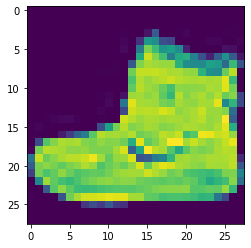

In [6]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
np.set_printoptions(linewidth=320)

#print the data (image and label)
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

# Visualize the image
plt.imshow(train_images[index])


All values are between 0 and 255. To normalize the image simply devide by 255.0

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

RuntimeError: Physical devices cannot be modified after being initialized

In [8]:
#Simply NN model
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])  #Softmax for multi output. It outputs the highest probability index.

2022-08-20 16:57:26.765634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 16:57:26.770025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 16:57:26.770439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 16:57:26.771078: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
 196/1875 [==>...........................] - ETA: 1s - loss: 0.7820 - accuracy: 0.7235

2022-08-20 17:02:28.006334: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 2s 748us/step - loss: 0.4979 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 1s 741us/step - loss: 0.3749 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 1s 737us/step - loss: 0.3394 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 1s 748us/step - loss: 0.3116 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 1s 747us/step - loss: 0.2932 - accuracy: 0.8919


In [13]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)  

313/313 [==============================] - 0s 791us/step - loss: 0.3633 - accuracy: 0.8653


[0.36331629753112793, 0.8652999997138977]

#### Exploration Exercise

Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [15]:
classifications = model.predict(test_images)

print(classifications[0]) #print a list of indexes because of softmax activation in the last layer

[6.63572973e-06 2.88598994e-08 7.84373356e-07 5.19716572e-08 1.12345315e-05 8.24277550e-02 2.42786500e-05 3.78160700e-02 9.01246494e-06 8.79704118e-01]


In [16]:
print(test_labels[0])

9


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? <br>
Ans: That is the real label that represent boot

#### E1Q1: What does this list represent?
- It's 10 random meaningless values
- It's the first 10 classifications that the computer made
- <b>It's the probability that this item is each of the 10 classes/b>

#### E1Q2: How do you know that this list tells you that the item is an ankle boot?
- There's not enough information to answer that question
- <b> The 10th element on the list is the biggest, and the ankle boot is labelled 9</b>
- The ankle boot is label 9, and there are 0->9 elements in the list

#### Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [17]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

11501568/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 1s 695us/step - loss: 0.1854
Epoch 2/5
1875/1875 [==============================] - 1s 688us/step - loss: 0.0750
Epoch 3/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.0473
Epoch 4/5
1875/1875 [==============================] - 1s 679us/step - loss: 0.0363
Epoch 5/5
313/313 [==============================] - 0s 702us/step - loss: 0.0769
[7.48155315e-09 2.73916834e-10 2.11018545e-08 1.05404276e-07 1.80732355e-13 8.67783484e-11 3.56679877e-12 9.99999523e-01 1.23192601e-09 3.15499108e-07]
7


Exercise 3:
E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case?
<br>Ans: Error because of shape of data
<br>You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [20]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: in user code:

    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/losses.py", line 1737, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/home/ki/enviornments/tensorflow/lib/python3.8/site-packages/keras/backend.py", line 5113, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


Exercise 4:
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5. <br>
you get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [21]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 1s 675us/step - loss: nan
Epoch 2/5
1875/1875 [==============================] - 1s 670us/step - loss: nan
Epoch 3/5
1875/1875 [==============================] - 1s 686us/step - loss: nan
Epoch 4/5
1875/1875 [==============================] - 1s 724us/step - loss: nan
Epoch 5/5
313/313 [==============================] - 0s 695us/step - loss: nan
[nan nan nan nan nan]
7


Exercise 5:
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. <br>
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.


In [22]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.1960
Epoch 2/5
1875/1875 [==============================] - 2s 829us/step - loss: 0.0866
Epoch 3/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.0621
Epoch 4/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.0474
Epoch 5/5
313/313 [==============================] - 0s 750us/step - loss: 0.0939
[1.4388630e-11 1.6470095e-09 4.2798337e-08 3.7007888e-07 3.1516592e-09 6.0997964e-12 1.5233566e-13 9.9999964e-01 3.3278762e-09 2.8742704e-08]
7


Exercise 6: <br>
E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? <br>
Ans: The more epoch the better accuracy but there will be diminishing return


Exercise 7: <br>
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. <br>What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?
<br> Decent accuracy but huge loss: Made make errors of a few data

Accuracy can be seen as the number of error you made on the data.

That means:

- a low accuracy and huge loss means you made huge errors on a lot of data
- a low accuracy but low loss means you made little errors on a lot of data
- a great accuracy with low loss means you made low errors on a few data (best case)


My situation: a great accuracy but a huge loss, means you made huge errors on a few data.


In [30]:
from tabnanny import verbose


mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(training_images, training_labels, epochs=5, verbose=1)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 2s 779us/step - loss: 2.6023 - acc: 0.9068
Epoch 2/5
1875/1875 [==============================] - 1s 786us/step - loss: 0.3386 - acc: 0.9353
Epoch 3/5
1875/1875 [==============================] - 1s 783us/step - loss: 0.2941 - acc: 0.9423
Epoch 4/5
1875/1875 [==============================] - 1s 787us/step - loss: 0.2616 - acc: 0.9487
Epoch 5/5
313/313 [==============================] - 0s 781us/step - loss: 0.3539 - acc: 0.9443
[0.0000000e+00 9.5444138e-20 5.0659727e-17 2.9477726e-17 3.4376906e-27 7.2603975e-20 0.0000000e+00 1.0000000e+00 1.4450033e-28 2.0245161e-21]
7


Exercise 8: (callback)<br> 
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.88): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 2s 804us/step - loss: 0.4758 - accuracy: 0.8302
Epoch 2/15
1875/1875 [==============================] - 1s 794us/step - loss: 0.3607 - accuracy: 0.8668
Epoch 3/15
1862/1875 [============================>.] - ETA: 0s - loss: 0.3221 - accuracy: 0.8807
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 1s 786us/step - loss: 0.3222 - accuracy: 0.8807
